In [35]:
from flask import Flask, jsonify, request
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from flask import Flask, request, session, g, redirect, url_for, abort, \
     render_template, flash
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [134]:
large = pd.read_csv('data/used_cars.csv')

In [135]:
large.head()

,index,Mileage,price,ModelYear,brakes,airbag,camera,controls,speakers,video,...,keyless,heated,leather,armrest,total,Drivetrain,Fuel Type,Transmission,Make,Model
0,0,89843.0,28800.0,1994.0,2,2,0,1,0,0,...,0,2,1,0,145,3,3,0,50,421
1,4,102685.0,5999.0,2012.0,5,7,0,10,2,4,...,1,0,0,3,447,2,3,0,31,314
2,5,13793.0,176500.0,2017.0,5,9,1,11,3,6,...,1,7,4,3,453,3,3,0,3,152
3,6,41050.0,34695.0,2013.0,4,6,0,11,1,6,...,1,6,4,0,375,3,3,0,6,287
4,7,2592.0,429800.0,2015.0,4,2,1,11,0,1,...,1,1,3,0,405,3,3,0,12,32


In [101]:
large=large.dropna()
large=large.drop('index', axis=1)

X=large.drop('price', axis=1)
y=large[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=90, learning_rate=0.1,
     max_depth=5, random_state=0, loss='ls')

gbr.fit(X_train, np.log(y_train))
gbr.score(X_train, np.log(y_train))
gbr.score(X_test, np.log(y_test))
y_pred=gbr.predict(X_test)
y_pred=np.exp(y_pred)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
y_pred[0]

27665.920712400926

In [133]:
large.loc[0]

Mileage         89843.0
ModelYear        1994.0
brakes              2.0
airbag              2.0
camera              0.0
controls            1.0
speakers            0.0
video               0.0
bluetooth           0.0
alarm               1.0
navigations         0.0
digital             0.0
keyless             0.0
heated              2.0
leather             1.0
armrest             0.0
total             145.0
Drivetrain          3.0
Fuel Type           3.0
Transmission        0.0
Make               50.0
Model             421.0
Name: 0, dtype: float64

In [104]:
len(large.columns)

23

In [108]:
def predcars():
    data = {} 
    if request.form:
        # get the form data
        form_data = request.form
        data['form'] = form_data
        predict_mile = float(form_data['predict_mile'])
        predict_modelyear=float(form_data['predict_year'])
        predict_brake=float(form_data['predict_brake'])
        predict_airbag=float(form_data['predict_airbag'])
        predict_camera=float(form_data['predict_camera'])
        predict_control=float(form_data['predict_control'])
        predict_speaker=float(form_data['predict_speaker'])
        predict_video=float(form_data['predict_video'])
        predict_bluetooth=float(form_data['predict_bluetooth'])
        predict_alarm=float(form_data['predict_alarm'])
        predict_navigation=float(form_data['predict_navigation'])
        predict_digital=float(form_data['predict_digital'])
        predict_keyless=float(form_data['predict_keyless'])
        predict_heated=float(form_data['predict_heated'])
        predict_leater=float(form_data['predict_leather'])
        predict_armrest=float(form_data['predict_armrest'])
        predict_total=float(form_data['predict_total'])
        predict_drivetrain=float(form_data['predict_drivetrain'])
        predict_fueltype=float(form_data['predict_fueltype'])
        predict_transmission=float(form_data['predict_transmission'])
        predict_make=float(form_data['predict_make'])
        predict_model=float(form_data['predict_model'])
        input_data = np.array([predict_mile,
                                predict_modelyear,
                                predict_brake,
                                predict_airbag,
                                predict_camera,
                                predict_control,
                                predict_speaker,
                                predict_video,
                                predict_bluetooth,
                                predict_alarm,
                                predict_navigation,
                                predict_digital,
                                predict_keyless,
                                predict_heated,
                                predict_leater,
                                predict_armrest,
                                predict_total,
                                predict_drivetrain,
                                predict_fueltype,
                                predict_transmission,
                                predict_make, 
                                predict_model])
        
        # get prediction
        prediction = gbr.predict(input_data.reshape(1, -1))
        prediction = prediction[0][1] # probability of survival
        data['prediction'] = 'Approximate price is {:.1f}%'.format(prediction)
    return render_template('cars.html', data=data)

In [ ]:
89843.0	28800.0	1994.0	2	2	0	1	0	0	0	...	0	2	1	0	145	3	3	0	50	421

In [109]:
input_data = np.array([89843.0, 28800.0, 1994.0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 145, 3, 3, 0, 50, 421])

In [122]:
len(input_data)

23

In [124]:
large=large.drop('price', axis=1)

In [125]:
input_data=large.loc[3].values

In [131]:
input_data

array([  4.10500000e+04,   2.01300000e+03,   4.00000000e+00,
         6.00000000e+00,   0.00000000e+00,   1.10000000e+01,
         1.00000000e+00,   6.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   6.00000000e+00,   4.00000000e+00,
         0.00000000e+00,   3.75000000e+02,   3.00000000e+00,
         3.00000000e+00,   0.00000000e+00,   6.00000000e+00,
         2.87000000e+02])

In [126]:
input_data.reshape(1, -1)

array([[  4.10500000e+04,   2.01300000e+03,   4.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   1.10000000e+01,
          1.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   6.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   3.75000000e+02,   3.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          2.87000000e+02]])

In [127]:
prediction = gbr.predict(input_data.reshape(1, -1))

In [130]:
prediction[0]

10.392988696711312

In [69]:
large.heated.unique()

array([ 2,  0,  7,  6,  1,  4,  5,  9,  3,  8, 10, 11, 12, 14])

In [70]:
large['heated'].unique()

array([ 2,  0,  7,  6,  1,  4,  5,  9,  3,  8, 10, 11, 12, 14])

In [95]:
for i in large.columns:
    if i not in ['index', 'Mileage', 'price','total']:
#         print(str(i)+" "+large[str(i)].unique())
        print ('%s: %s' % (str(i),large[str(i)].unique()))

ModelYear: [ 1994.  2012.  2017.  2013.  2015.  2005.  2016.  1996.  2007.  2010.
  2014.  2018.  2006.  2011.  2004.  2002.  2009.  1997.  2008.  2000.
  2003.  1998.  1990.  1999.  2001.  1995.  1988.  1993.  1984.  1987.
  2019.  1992.  1991.]
brakes: [ 2  5  4  1  3  6  7  0  9  8 10 13 14]
airbag: [ 2  7  9  6  3  1  0  8  4 11 10  5 12]
camera: [0 1 2 4 3]
controls: [ 1 10 11  7  0  9  5  2  6  8 12 13  3  4 14 18 20 16 15 17]
speakers: [0 2 3 1 4 5]
video: [ 0  4  6  1  3  8  2  9 10  7  5 11 12 13 24 17 16 21 14 15 23 20 25]
bluetooth: [0]
alarm: [1 2 0 3 6 4]
navigations: [0 1 2 3 4]
digital: [0 1 2 4 3 6]
keyless: [0 1 2 3 4 5 7 6]
heated: [ 2  0  7  6  1  4  5  9  3  8 10 11 12 14]
leather: [ 1  0  4  3  2  6  5  7  9  8 10 11 13]
armrest: [0 3 1 2 4 5]
Drivetrain: [3 2 0 1]
Fuel Type: [3 1 0 2 4 5 6]
Transmission: [0 1]
Make: [50 31  3  6 12 15 36 37 33 27 40 23  9  4 26 30 17  0 18  5 32  8 11 29 49
 21 51 25 20 22  1 47 41 52 10 39  7 28 24 43 16 35  2 45 19 13 42 44 48 3

In [ ]:
large

In [55]:
large=large.dropna()

X=large.drop('price', axis=1)
y=large[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf=RandomForestRegressor(max_depth=25, min_samples_leaf=4, n_estimators=45)

In [12]:
rf.fit(X_train, np.log(y_train))
rf.score(X_train, np.log(y_train))
rf.score(X_test, np.log(y_test))
y_pred=rf.predict(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [13]:
rf.score(X_train, np.log(y_train))

0.88864907322584441

In [14]:
rf.score(X_test, np.log(y_test))

0.67070628167898716

In [15]:
y_pred

array([  9.8948165 ,  10.06740573,  10.50615504, ...,   9.10049753,
        10.31275897,   9.65006098])

In [56]:
est = GradientBoostingRegressor(n_estimators=90, learning_rate=0.1,
     max_depth=5, random_state=0, loss='ls')

In [57]:
est.fit(X_train, y_train)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [58]:
est.score(X_train, y_train)

0.98796541641013103

In [59]:
est.score(X_test, y_test)

-0.21893823489092387

In [60]:
est.fit(X_train, np.log(y_train))

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=90, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [61]:
est.score(X_train, np.log(y_train))

0.91600043586469326

In [62]:
est.score(X_test, np.log(y_test))

0.7639916608764652

In [63]:
y_pred=est.predict(X_test)

In [64]:
y_pred=np.exp(y_pred)

In [66]:
y_pred

array([ 27502.38406574,  23866.61945863,  37625.61502512, ...,
         8505.97819574,  30136.37917245,  13045.69696078])

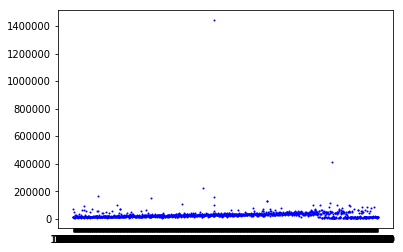

In [65]:
plt.scatter(y_test, y_pred, color='blue', s=1)

In [47]:
y_test['y_pred']=[np.exp(x) for x in y_pred]

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
y_test.head()

,price,y_pred
3628,27455.0,27502.384066
2016,24850.0,23866.619459
990,34995.0,37625.615025
3160,14600.0,20023.323335
120,24987.0,25529.033724


In [46]:
np.exp(y_pred[2])

37625.615025118648